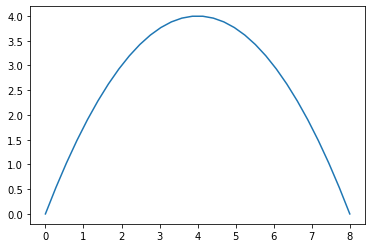

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def f(x): return 2*x - (x**2 / 4)

x = np.linspace(0, 8, num = 30)
y = f(x)

plt.plot(x, f(x))

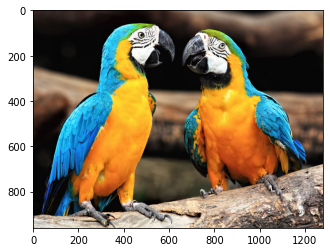

In [2]:
img = cv.imread('papageien.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

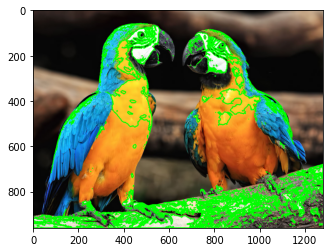

In [3]:
img = cv.imread('papageien.jpg')
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 190, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

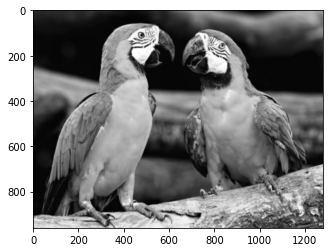

In [4]:
img = cv.imread('papageien.jpg')
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_blur = cv.blur(imgray, (5,5))

plt.imshow(img_blur, cmap='gray', vmin=0, vmax=255)



(960, 1280)

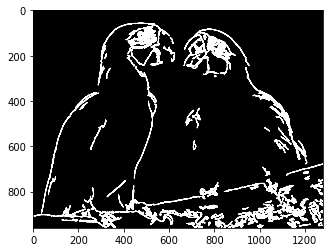

In [5]:
threshold = 80
ratio = 3
kernel_size = 3
c = cv.Canny(img_blur, threshold, threshold*ratio, kernel_size)
plt.imshow(c, cmap='gray', vmin=0, vmax=10)
c.shape

In [18]:
mask = np.zeros(c.shape, dtype=np.uint8)
tria = np.array([[430,750], [400,400], [595, 400]])
cv.drawContours(mask, [tria], -1, 255, 10)
len(cv.findNonZero(mask))

10044

In [19]:
masked = cv.bitwise_and(c,c,mask = mask)
len(cv.findNonZero(masked))

189

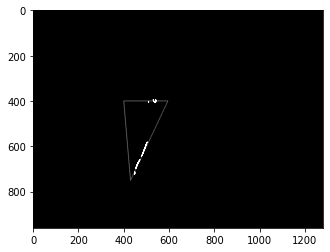

In [20]:
cv.drawContours(masked, [tria], -1, 5, 2)
plt.imshow(masked, cmap='gray', vmin=0, vmax=10)